In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here we compute $\int Tr(\rho^2)d\rho$ where the integral is taken over all density matrices equipped with the uniform distribution. Every density matrix $\rho$ in finite dimensions can be written as $\rho = U\Lambda U^*$, where $\Lambda$ is a diagonal matrix, with positive entries summing to 1, and U is a unitary matrix. This implies that the uniform distribution $d\rho$ on $D(\mathbb{C}^d)$ can be defined by $d\rho = d\Lambda_n dU$ where $d\Lambda_n$ is the dirichlet distribution in $n$ variables, and $dU$ is the Haar measure on unitary group $\mathbb{U}(d)$.

Since the $U$s are unitary and the trace is cyclic, this integral reduces to $\int Tr(\Lambda^2)d\Lambda_n$. Thus to compute this expectation or look at the distribution of the purity, we need only generate samples from the dirichlet distribution. 

In [2]:
d=16
size=10000
alpha = np.ones(d)

In [3]:
dirichlet_samples = np.random.dirichlet(alpha,size=size)

In [4]:
purity_samples = [np.dot(sample,sample) for sample in dirichlet_samples]

By the law of large numbers, the integral is approximately equal to the average of the purity samples. 

In [6]:
#Value of Integral
integral = (1/size)*sum(purity_samples)

In [7]:
integral

0.1173307609629293

In [9]:
error = np.abs(2/17-integral)

In [10]:
error

0.0003162978606001121

Now let's take a look at the distribution of the purity to get a sense of the skewness. 

(0.0, 1.0)

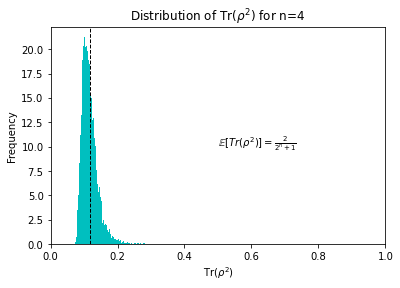

In [5]:
plt.hist(purity_samples,bins=100,density=True,color='c')
plt.axvline(2/(d+1), color='k', linestyle='dashed', linewidth=1)
plt.text(.5, 10, r'$\mathbb{E}[Tr(\rho^2)]=\frac{2}{2^n+1}$')
plt.title(r'Distribution of Tr$(\rho^2)$ for n='+str(int(np.log2(d))))
plt.xlabel(r'Tr$(\rho^2)$')
plt.ylabel('Frequency')
plt.xlim(0,1)


Notice how the distribution is heavily concentrated around its mean. This is an example of the concentration of measure phenomenon. 